# Intergrate OpenAI API for Python Programming via Chapyter

This notebook is designed to provide you with step-by-step instructions and practical examples to integrate the OpenAI API into JupyterLab using the Chapyter tool.

## Notebook Outline:
- [Introduction](#intro)
- [Setup](#setup)
- [Chapyter](#chapyter)
    - [Chapyter Setup](#chapyter_setup)
    - [Chapyter Line Magic Functions](#chapyter_usages)
- [Usage Case: Generating Maps](#case)

<a id='intro'></a>
## Introduction

Chapyter is a JupyterLab extension that seamlessly connects GPT API to your coding environment. It features a code interpreter that can translate your natural language description into Python code and automatically execute it. Incorporating powerful code generation models like GPT-4 into the notebook coding environment opens up new modes of human-AI collaboration. In addition, we show a case how to use Chapyter to generate a map.  

To use Chapyter, OpenAI account and secret API key are required. All new users get free $5 worth of free tokens that will expire after 3 months. Links below show how to acquire your secret API key.
>OpenAI account signup: https://platform.openai.com/
<br>Find the secret API key: https://help.openai.com/en/articles/4936850-where-do-i-find-my-secret-api-key
<br>OpenAI API: https://platform.openai.com/docs/introduction
<br>Chapyter github: https://github.com/chapyter/chapyter


<a id='setup'></a>
## Setup

In [ ]:
# install required libraries
!pip install openai
!pip install chapyter

In [1]:
# load JupyterLab extension chapyter
%load_ext chapyter

In [2]:
# import required libraries
import openai

In [3]:
# Your secreate OpenAI API key
# Put API key in notebook is not a safe way for secret key protection
# Check Best Practices for API Key Safety:
# https://help.openai.com/en/articles/5112595-best-practices-for-api-key-safety
OPENAI_API_KEY = "your_api_key_here"

<a id='chapyter'></a>
## Chapyter

<a id='chapyter_setup'></a>
### Chapyter Setup

In [4]:
# Check Chapyter(Magics) options
%chapyter

Chapyter(Magics) options
----------------------
Chapyter.azure_openai_api_base=<Unicode>
    The base URL for Azure API. Can be left empty if not using Azure.
    Current: ''
Chapyter.azure_openai_api_key=<Unicode>
    The API key used for Azure API queries. By default this will be read from
    the `AZURE_OPENAI_API_KEY` environment variable. Can be left empty if not
    using Azure.
    Current: ''
Chapyter.azure_openai_api_version=<Unicode>
    The version of Azure API being used. Can be left empty if not using Azure.
    Current: ''
Chapyter.azure_openai_default_deployment_id=<Unicode>
    The default deployment id for Azure API. Different from OpenAI API, Azure
    API requires a deployment id to be specified. Can be left empty if not using
    Azure.
    Current: ''
Chapyter.azure_openai_default_model=<Unicode>
    The default model used for Azure API queries. Can be overridden by the
    --model flag.
    Current: ''
Chapyter.default_api_type=<Unicode>
    The default type of ap

In [5]:
# chapyter setups

# API key [required!]
%chapyter openai_api_key=OPENAI_API_KEY 

# GPT model used
# Check full models list
# https://platform.openai.com/docs/models
%chapyter openai_default_model="gpt-4-0613"

<a id='chapyter_usages'></a>
### Chapyter Line Magic Functions

In [6]:
# Docstring of migic functions
%%chat?

Docstring:
::

  %chat [--model MODEL] [--history] [--program PROGRAM] [--safe]
            [--verbose]

optional arguments:
  --model MODEL, -m MODEL
                        The model to be used for the chat interface.
  --history, -h         Whether to use history for the code.
  --program PROGRAM, -p PROGRAM
                        The program to be used for the chat interface.
  --safe, -s            Activate safe Mode that the code won't be
                        automatically executed.
  --verbose, -v         Whether to set slient=True for guidance calls.
File:      ~/.local/python3-0.9.4/lib/python3.8/site-packages/chapyter/magic.py


#### `%%chat`: coding in natural language

Start with `%%chat` in the first line, put coding prompt in the second line, the code cell will be generated automatically below the cell.

In [7]:
%%chat
list all the files in the current directory

In [8]:
# Assistant Code for Cell [7]:
# Sure, here is the Python code to list all the files in the current directory:
import os

files = os.listdir('.')
print(files)

['date', 'intro_intergrate_openai.ipynb', '.ipynb_checkpoints']


#### `%%chat -m`: setting model to be use for this call

In [9]:
%%chat -m gpt-3.5-turbo 
List all the files in the current folder

In [10]:
# Assistant Code for Cell [9]:

import os

files = os.listdir('.')
for file in files:
    print(file)

date
intro_intergrate_openai.ipynb
.ipynb_checkpoints


In [11]:
%chapyter openai_default_model

'gpt-4-0613'

#### `%%chat -h`: adding execution history into the prompt

In [12]:
%%chat -h
Define functions for the code above:

In [ ]:
# Assistant Code for Cell [12]:
# Sure, here are the functions for the code above:
# Function to load JupyterLab extension chapyter
def load_chapyter_extension():
    %load_ext chapyter

# Function to import required libraries
def import_libraries():
    import openai

# Function to set OpenAI API key
def set_openai_api_key(api_key):
    OPENAI_API_KEY = api_key

# Function to check Chapyter(Magics) options
def check_chapyter_options():
    %chapyter

# Function to setup chapyter
def setup_chapyter(api_key, model):
    %chapyter openai_api_key=api_key
    %chapyter openai_default_model=model

# Function to get docstring of magic functions
def get_magic_functions_docstring():
    %%chat?

# Function to list all the files in the current directory
def list_files_in_current_directory():
    import os
    files = os.listdir('.')
    for file in files:
        print(file)

# Function to get the default model of chapyter
def get_chapyter_default_model():
    return %chapyter openai_default_model
# Please note that these functions are designed to be used in a Jupyter notebook environment. If you are using a different environment, you may need to adjust the code accordingly. Also, the `get_magic_functions_docstring` function may not work as expected because it's not clear what `%%chat?` does.

#### `%%chat -s` or `%%chat --safe`: invoking safe mode that won't execute the cells

In [13]:
%%chat -s
list all the files in the current directory

#### `%%chatonly`: chating in regular ways

In [14]:
%%chatonly?

Docstring:
::

  %chatonly [--model MODEL] [--verbose]

optional arguments:
  --model MODEL, -m MODEL
                        The model to be used for the chat interface.
  --verbose, -v         Whether to set slient=True for guidance calls.
File:      ~/.local/python3-0.9.4/lib/python3.8/site-packages/chapyter/magic.py


In [15]:
%%chatonly
Is there a website I can find boundry file for each city in illinois state?

Yes, you can find boundary files for each city in Illinois state from the U.S. Census Bureau's website. They provide shapefiles for all states and counties in the U.S. Here is the link to their website: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html

You can download the files and use GIS software to view and analyze them. Please note that you need to have some knowledge of GIS to use these files.


**Note**: `chatonly -h` is not usable to know previous chatonly output since it's not an execution.

In [16]:
%%chatonly -h
Then, how can I download it?

I'm sorry, but I need more information to assist you. Could you please specify what you're trying to download?


In [17]:
%%chat -h
Then, how can I download it?

In [ ]:
# Assistant Code for Cell [17]:
# To find boundary files for each city in Illinois state, you can use the United States Census Bureau's TIGER/Line Shapefiles. These files contain geographic and cartographic information from the Census Bureau. Here is the website: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html
# To download the files:
# 1. Visit the website above.
# 2. Click on "Web Interface" under the "Accessing TIGER/Line Shapefiles" section.
# 3. Select the desired year.
# 4. Under "Select a layer type", choose "Places (Incorporated Places and Census Designated Places)".
# 5. Under "Select a state", choose "Illinois".
# 6. Click "Submit".
# 7. You will be redirected to a page where you can download the shapefiles.
# To download the files programmatically, you can use the `requests` library in Python. Here is an example:
import requests

url = 'url_of_the_file'
response = requests.get(url)

with open('filename.zip', 'wb') as f:
    f.write(response.content)
# Please replace `'url_of_the_file'` with the actual URL of the file you want to download, and `'filename.zip'` with the desired name for the downloaded file.
# Note: The URL of the file can be obtained by right-clicking on the download link and selecting "Copy link address" (the exact wording may vary depending on the browser).

<a id='case'></a>
## Usage Case: Generating Maps

In [33]:
%%chat
list all the files in the data folder in the current directory

In [34]:
# Assistant Code for Cell [33]:
# Sure, here is the Python code to list all the files in the 'data' folder in the current directory.
import os

data_folder_path = './data'
files = os.listdir(data_folder_path)

for file in files:
    print(file)

Chicago_Community.geojson
Chicago.tif


In [35]:
%%chat
data/Chicago.tif is raster data. GeoTIFF extends the TIFF image format by including geospatial context of the corresponding image. Load the data and visualize the raster data.

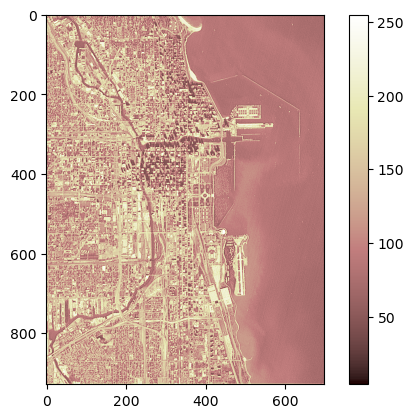

In [37]:
# Assistant Code for Cell [35]:
# Sure, here is how you can load and visualize a GeoTIFF file using rasterio and matplotlib libraries in Python.
import rasterio
from matplotlib import pyplot as plt

# Open the file
src = rasterio.open('data/Chicago.tif')

# Read the raster data
raster = src.read(1)

# Plot the raster data
plt.imshow(raster, cmap='pink')
plt.colorbar()
plt.show()
# This code will open the GeoTIFF file, read the raster data, and then plot it using matplotlib. The color map 'pink' is used for visualization, but you can change it to any other color map as per your preference.

In [38]:
%%chat
data/Chicago_Community.geojson is vector data for chicago community. A GeoJson is a straight-forward format derived from Json. Load the data and visualize the vetor data in the map. 

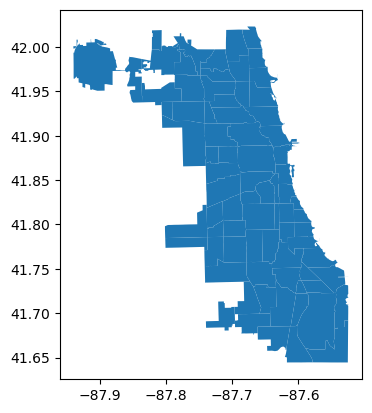

In [39]:
# Assistant Code for Cell [38]:
# Sure, you can use the geopandas and matplotlib libraries in Python to load and visualize GeoJSON data. Here's how you can do it:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON data
chicago_community = gpd.read_file('data/Chicago_Community.geojson')

# Plot the GeoJSON data
chicago_community.plot()

# Show the plot
plt.show()
# This will load the GeoJSON file and plot it using matplotlib. The `plot()` function is a simple way to visualize the geometric shapes in the GeoJSON file.

In [40]:
%%chat -h
show the attribute for Chicago_Community data

In [41]:
# Assistant Code for Cell [40]:
# To show the attributes of the GeoJSON data, you can simply print the GeoDataFrame after loading the file. Here's how you can do it:
import geopandas as gpd

# Load GeoJSON data
chicago_community = gpd.read_file('data/Chicago_Community.geojson')

# Print the GeoDataFrame
print(chicago_community)
# This will print the GeoDataFrame, which includes all the attributes of the GeoJSON data. Each row represents a feature (geometric shape) in the GeoJSON file, and each column represents an attribute of the features.

          community area     shape_area perimeter area_num_1 area_numbe  \
0           DOUGLAS    0  46004621.1581         0         35         35   
1           OAKLAND    0  16913961.0408         0         36         36   
2       FULLER PARK    0  19916704.8692         0         37         37   
3   GRAND BOULEVARD    0  48492503.1554         0         38         38   
4           KENWOOD    0  29071741.9283         0         39         39   
..              ...  ...            ...       ...        ...        ...   
72  MOUNT GREENWOOD    0  75584290.0209         0         74         74   
73      MORGAN PARK    0  91877340.6988         0         75         75   
74            OHARE    0  371835607.687         0         76         76   
75        EDGEWATER    0  48449990.8397         0         77         77   
76      EDISON PARK    0  31636313.7864         0          9          9   

   comarea_id comarea      shape_len  \
0           0       0  31027.0545098   
1           0      

In [42]:
%%chat -h
For Chicago_Community data, use folium to load a basemap first and center at chicago. Add vector data to the basemap, and show the community name when hover over the community area. community name is in vector data attribute "community".

In [44]:
# Assistant Code for Cell [42]:
# Sure, you can use the folium library in Python to create an interactive map and add GeoJSON data to it. Here's how you can do it:
import folium
import geopandas as gpd

# Load GeoJSON data
chicago_community = gpd.read_file('data/Chicago_Community.geojson')

# Create a Map instance
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Add GeoJSON to map
folium.GeoJson(
    chicago_community,
    name='Chicago Community',
    tooltip=folium.GeoJsonTooltip(fields=['community'], labels=True)
).add_to(m)

# Show map
m
# This code will create a map centered at Chicago (latitude 41.8781, longitude -87.6298) and add the GeoJSON data to it. The `GeoJsonTooltip` function is used to show the community name when you hover over the community area. The community name is taken from the 'community' attribute of the GeoJSON data.